In [0]:
active_df = spark.read.parquet("/mnt/airline/processed-data/combined_df")
active_df.printSchema()

root
 |-- Loyalty Number: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Total Flights: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Points Accumulated: double (nullable = true)
 |-- Points Redeemed: double (nullable = true)
 |-- Dollar Cost Points Redeemed: double (nullable = true)
 |-- Country: string (nullable = true)
 |-- Province: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Postal Code: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Salary: integer (nullable = true)
 |-- Marital Status: string (nullable = true)
 |-- Loyalty Card: string (nullable = true)
 |-- CLV: double (nullable = true)
 |-- Enrollment Type: string (nullable = true)
 |-- Enrollment Year: integer (nullable = true)
 |-- Enrollment Month: integer (nullable = true)
 |-- Cancellation Year: integer (nullable = true)
 |-- Cancellation Month: integer (nul

### What impact did the campaign have on booked flights during summer?

In [0]:
from pyspark.sql.functions import *

summer_months = [6, 7, 8]

# Filter for summer months
df_summer = active_df.filter(col("Month").isin(summer_months))

In [0]:
df_summer.describe().display()

summary Loyalty Number Year Month Total Flights Distance Points Accumulated Points Redeemed Dollar Cost Points Redeemed Country Province City Postal Code Gender Education Salary Marital Status Loyalty Card CLV Enrollment Type Enrollment Year Enrollment Month Cancellation Year Cancellation Month count 26405 26405 26405 26405 26405 26405 26405 26405 26405 26405 26405 26405 26405 26405 26405 26405 26405 26405 26405 26405 26405 26405 26405 mean 551256.3289149782 2018.991895474342 7.003787161522439 1.8237455027456921 2725.3290285930693 2903.897784510509 38.85964779397841 6.9951524332512784 null null null null null null 59122.99087294073 null null 8123.654321530031 null 2015.182086725999 6.767506154137474 242.61916303730354 0.8301836773338382 stddev 259157.5997401372 0.8169510017332993 0.8154976436206208 2.717007203911284 4492.1872658795155 5673.181856376175 153.5981482549628 27.649666666879668 null null null null null null 45151.24925303435 null null 6973.763137271541 null 1.9517211727947608 3.3797302988410904 656.0406342230916 2.541077045262658 min 100018 2018 6 0.0 0.0 0.0 0.0 0.0 Canada Alberta Banff A1C 6H9 Female Bachelor 0 Divorced Aurora 1898.01 2018 Promotion 2012 1 0 0 max 999986 2020 8 28.0 67256.0 100884.0 873.0 157.0 Canada Yukon Winnipeg Y2K 6R0 Male Master 407228 Single Star 83325.38 Standard 2018 12 2018 12

In [0]:
summer_flights_trend = df_summer.groupBy("Year", "Month") \
    .agg(sum("Total Flights").alias("Total Flights")) \
    .orderBy("Year", "Month").display()

Year Month Total Flights 2018 6 5274.0 2018 7 5928.0 2018 8 5165.0 2019 6 5210.0 2019 7 5850.0 2019 8 5141.0 2020 6 4954.0 2020 7 5879.0 2020 8 4755.0

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

In [0]:
# Analyze the relationship between Points Redeemed and Total Flights
points_flights_corr = df_summer.stat.corr("Points Redeemed", "Total Flights")
print(f"Correlation between Points Redeemed and Total Flights during summer: {points_flights_corr}")

Correlation between Points Redeemed and Total Flights during summer: 0.15080854031943747


In [0]:
summer_points_flights = df_summer.groupBy("Year", "Month") \
    .agg(sum("Points Redeemed").alias("Total Points Redeemed"),
         sum("Total Flights").alias("Total Flights")).display()

Year Month Total Points Redeemed Total Flights 2020 6 121027.0 4954.0 2018 8 110457.0 5165.0 2019 8 96056.0 5141.0 2019 6 102423.0 5210.0 2020 8 107593.0 4755.0 2018 7 120449.0 5928.0 2020 7 135274.0 5879.0 2018 6 110759.0 5274.0 2019 7 122051.0 5850.0

Databricks visualization. Run in Databricks to view.

In [0]:

relevant_columns = ["Total Flights", "Points Redeemed", "Distance"]
corr_data = []

for col1 in relevant_columns:
    for col2 in relevant_columns:
        if col1 != col2: 
            correlation = df_summer.corr(col1, col2)  
            corr_data.append((col1, col2, correlation)) 

corr_df = spark.createDataFrame(corr_data, ["Feature 1", "Feature 2", "Correlation"])

corr_df.display()


Feature 1 Feature 2 Correlation Total Flights Points Redeemed 0.15080854031943747 Total Flights Distance 0.9063458207636496 Points Redeemed Total Flights 0.15080854031943747 Points Redeemed Distance 0.13574886111742532 Distance Total Flights 0.9063458207636496 Distance Points Redeemed 0.1357488611174253

Databricks visualization. Run in Databricks to view.

/root/.ipykernel/1214/command-1790666555129319-1020133546:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_dict[feature_x], shade=True, color="blue")
/root/.ipykernel/1214/command-1790666555129319-1020133546:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/root/.ipykernel/1214/command-1790666555129319-1020133546:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/root/.ipykernel/1214/command-1790666555129319-1020133546:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/root/.ipykernel/1214/command-1790666555129319-1020133546:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_dict[feat

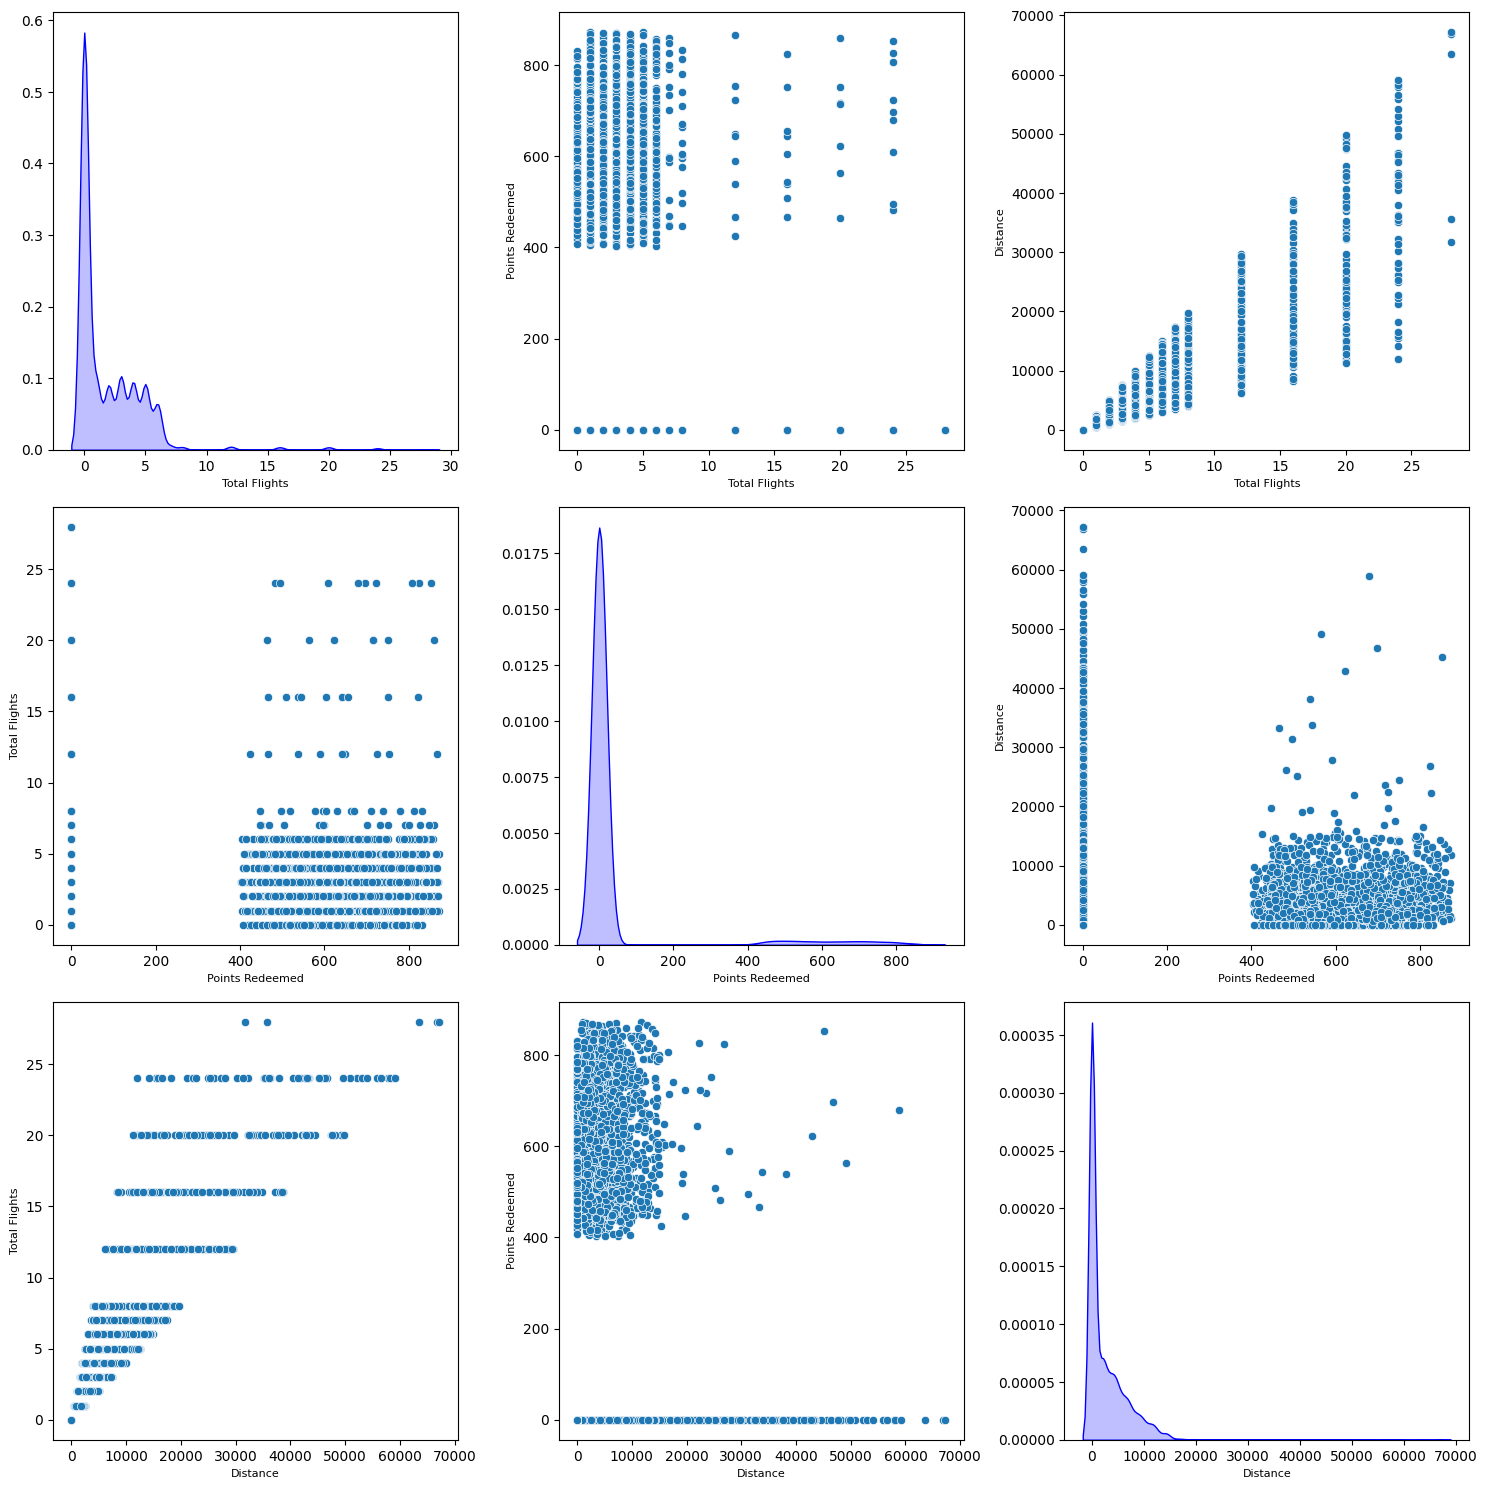

In [0]:

import matplotlib.pyplot as plt
import seaborn as sns

columns = ["Total Flights", "Points Redeemed", "Distance"]
data = df_summer.select(columns).collect()  
data_dict = {col: [row[col] for row in data] for col in columns}
features = columns
plt.figure(figsize=(15, 15))
num_features = len(features)
for i, feature_x in enumerate(features):
    for j, feature_y in enumerate(features):
        plt.subplot(num_features, num_features, i * num_features + j + 1)
        if i == j:
            sns.kdeplot(data_dict[feature_x], shade=True, color="blue")
            plt.xlabel(feature_x, fontsize=8)
            plt.ylabel("")
        else:
            sns.scatterplot(
                x=data_dict[feature_x],
                y=data_dict[feature_y],
                palette="viridis",
                legend=False
            )
            plt.xlabel(feature_x, fontsize=8)
            plt.ylabel(feature_y, fontsize=8)
plt.tight_layout()
plt.show()
